# Question 1

## Import the dataset as a DataFrame and drop the first column

In [1]:
import pandas as pd

In [2]:
spotify = pd.read_csv("top50spotify.csv")

In [3]:
spotify = spotify.drop("SerialNo.", axis=1)

## Save it as 'top50.csv'

In [4]:
spotify.to_csv("top50.csv")

## Find the average Energy and Length of first 10 songs

In [11]:
print(spotify.loc[:9, ["Energy", "Length."]].sum()/10)

Energy      65.1
Length.    195.6
dtype: float64


In [17]:
print("Average Energy of First 10 Songs: ", sum(list(spotify.iloc[:10, 4]))/10)

Average Energy of First 10 Songs:  65.1


In [18]:
print("Average Length of First 10 Songs: ", sum(list(spotify.iloc[:10, 9]))/10)

Average Length of First 10 Songs:  195.6


## Find the total length of songs, group by genre from top to bottom

In [19]:
print(spotify.groupby("Genre")["Length."].sum())

Genre
atl hip hop          200
australian pop       210
big room             164
boy band             181
brostep              396
canadian hip hop     579
canadian pop         382
country rap          272
dance pop           1621
dfw rap              333
edm                  656
electropop           389
escape room          173
latin               1126
panamanian pop       514
pop                 1368
pop house            153
r&b en espanol       162
reggaeton            427
reggaeton flow       611
trap music           131
Name: Length., dtype: int64


In [7]:
for genre, _ in spotify.groupby("Genre"):
    print("Total Length of Songs of {} Genre: {}".format(genre, sum(list(spotify[spotify["Genre"] == genre].loc[:, "Length."]))))

Total Length of Songs of atl hip hop Genre: 200
Total Length of Songs of australian pop Genre: 210
Total Length of Songs of big room Genre: 164
Total Length of Songs of boy band Genre: 181
Total Length of Songs of brostep Genre: 396
Total Length of Songs of canadian hip hop Genre: 579
Total Length of Songs of canadian pop Genre: 382
Total Length of Songs of country rap Genre: 272
Total Length of Songs of dance pop Genre: 1621
Total Length of Songs of dfw rap Genre: 333
Total Length of Songs of edm Genre: 656
Total Length of Songs of electropop Genre: 389
Total Length of Songs of escape room Genre: 173
Total Length of Songs of latin Genre: 1126
Total Length of Songs of panamanian pop Genre: 514
Total Length of Songs of pop Genre: 1368
Total Length of Songs of pop house Genre: 153
Total Length of Songs of r&b en espanol Genre: 162
Total Length of Songs of reggaeton Genre: 427
Total Length of Songs of reggaeton flow Genre: 611
Total Length of Songs of trap music Genre: 131


## Print the artist name with the most number of tracks in one genre

In [24]:
keys = ["Genre", "Artist.Name", "NTracks"]
spotify_new = pd.DataFrame(columns=keys)
i = 0

for x, y in spotify.groupby(["Genre", "Artist.Name"]):
    spotify_new.loc[i] = [x[0], x[1], y["Artist.Name"].count()]
    i += 1
    

spotify_new[spotify_new["NTracks"] == spotify_new["NTracks"].max()]

,Genre,Artist.Name,NTracks
27,pop,Ed Sheeran,4


## Print the data of the tracks created by the artist from the previous question

In [25]:
spotify[spotify["Artist.Name"] == "Ed Sheeran"]

,Track.Name,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
3,Beautiful People (feat. Khalid),Ed Sheeran,pop,93,65,64,-8,8,55,198,12,19,86
5,I Don't Care (with Justin Bieber),Ed Sheeran,pop,102,68,80,-5,9,84,220,9,4,84
37,Antisocial (with Travis Scott),Ed Sheeran,pop,152,82,72,-5,36,91,162,13,5,87
49,Cross Me (feat. Chance the Rapper & PnB Rock),Ed Sheeran,pop,95,79,75,-6,7,61,206,21,12,82


# Question 2

## Create a pandas series from the below dictionary where indices are subjects

In [27]:
panSer = pd.Series({'English':{'Sam':60,'Jackson':74,'Ahree':85},'History':{'Gloria':83,'Sam':65,'Isla':78,'Aron':72,'Gray':61},'Geography':{'Jackson':92,'Gloria':95,'Isla':82,'Aron':75,'Ahree':76},'Mathematics':{'Sam':99,'Gloria':74,'Jackson':89,'Ahree':85,'Gray':95},'Science':{'Sam':89,'Aron':82,'Gray':78,'Isla':93,'Ahree':87}})

In [29]:
panSer = panSer.apply(pd.Series)
panSer

,Sam,Jackson,Ahree,Gloria,Isla,Aron,Gray
English,60.0,74.0,85.0,NaN,NaN,NaN,NaN
History,65.0,NaN,NaN,83.0,78.0,72.0,61.0
Geography,NaN,92.0,76.0,95.0,82.0,75.0,NaN
Mathematics,99.0,89.0,85.0,74.0,NaN,NaN,95.0
Science,89.0,NaN,87.0,NaN,93.0,82.0,78.0


## Convert the created series into DataFrame and replace the null values with zeroes

In [30]:
panDF = pd.DataFrame(panSer)
panDF = panDF.fillna(value=0)

In [31]:
panDF

,Sam,Jackson,Ahree,Gloria,Isla,Aron,Gray
English,60.0,74.0,85.0,0.0,0.0,0.0,0.0
History,65.0,0.0,0.0,83.0,78.0,72.0,61.0
Geography,0.0,92.0,76.0,95.0,82.0,75.0,0.0
Mathematics,99.0,89.0,85.0,74.0,0.0,0.0,95.0
Science,89.0,0.0,87.0,0.0,93.0,82.0,78.0


## Transpose the DataFrame and create a new column 'Average' and fill the values in it by calculating the average of all subjects

In [32]:
panDF = panDF.transpose()

In [36]:
avg = []
for i in range(len(panDF)):
    avg.append(panDF.iloc[i].mean())

panDF["Average"] = avg
panDF

,English,History,Geography,Mathematics,Science,Average
Sam,60.0,65.0,0.0,99.0,89.0,62.6
Jackson,74.0,0.0,92.0,89.0,0.0,51.0
Ahree,85.0,0.0,76.0,85.0,87.0,66.6
Gloria,0.0,83.0,95.0,74.0,0.0,50.4
Isla,0.0,78.0,82.0,0.0,93.0,50.6
Aron,0.0,72.0,75.0,0.0,82.0,45.8
Gray,0.0,61.0,0.0,95.0,78.0,46.8


# Question 3

## Write a Python program to create a series from 1 to 1000 and select only numbers divisible by 7 and 17

In [93]:
num = []

for i in range(1, 1001):
    if i % 7 == 0 and i % 17 == 0:
        num.append(i)

In [95]:
numSer = pd.Series(num)

In [96]:
numSer

0    119
1    238
2    357
3    476
4    595
5    714
6    833
7    952
dtype: int64

# Question 4

## Import the dataset cereal.csv

In [3]:
cereal = pd.read_csv("cereal.csv")

In [4]:
cereal.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280.0,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135.0,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320.0,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330.0,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,NaN,25,3,1.0,0.75,34.384843


## Plot ratings of different types of manufacturers

In [5]:
import matplotlib.pyplot as plt
import numpy as np

In [6]:
manufacturer = []
ratings = []

for i, data in cereal.groupby("mfr"):
    manufacturer.append(i)
    ratings.append(data["rating"].mean())

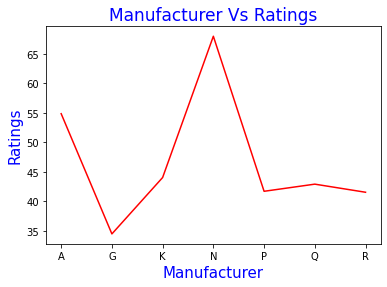

In [7]:
plt.plot(manufacturer, ratings, color = "red")
plt.xlabel("Manufacturer", color = "blue", size = 15)
plt.ylabel("Ratings", color = "blue", size = 15)
plt.title("Manufacturer Vs Ratings", color = "blue", size = 17)
plt.show()

## Use xticks range from 0-100

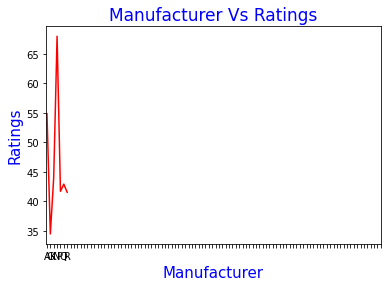

In [8]:
plt.plot(manufacturer, ratings, color = "red")
plt.xticks(range(0, 100))
plt.xlabel("Manufacturer", color = "blue", size = 15)
plt.ylabel("Ratings", color = "blue", size = 15)
plt.title("Manufacturer Vs Ratings", color = "blue", size = 17)
plt.show()

## Change the style of the graph to seaborn

In [9]:
import seaborn as sns

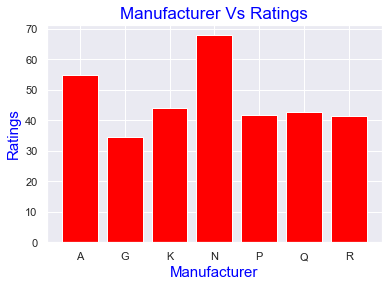

In [10]:
sns.set_theme()

plt.bar(manufacturer, ratings, color = "red")
plt.xlabel("Manufacturer", color = "blue", size = 15)
plt.ylabel("Ratings", color = "blue", size = 15)
plt.title("Manufacturer Vs Ratings", color = "blue", size = 17)
plt.show()